<font size="5"> The Logistic Function and S-shaped Curves</font> <br>

**Let's, use three different continous predictor variables. Fit three simple logistic regression models and plot the three fitted curves along with the base line logistic curve to analyze them.**

In [2]:
library(tidyverse)
library(magrittr)
library(dplyr)
library(ggplot2)

In [3]:
#read in the data
df <- read.csv("loan_dataset.csv")

In [4]:
#Convert target column to factors
df <- df %>% dplyr::mutate(Loan_Status = as.factor(Loan_Status))
head(df)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<fct>
1,Male,Yes,1,Graduate,No,4583,128,360,1,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,66,360,1,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,120,360,1,Urban,1
4,Male,No,0,Graduate,No,6000,141,360,1,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,267,360,1,Urban,1
6,Male,Yes,0,Not Graduate,No,2333,95,360,1,Urban,1


In [5]:
#model1
glm_model <- glm(
                formula = Loan_Status ~ ApplicantIncome,
                data = df,
                family = binomial()
                )
summary(
    object = glm_model
    )
coef.1 = coef(glm_model)


Call:
glm(formula = Loan_Status ~ ApplicantIncome, family = binomial(), 
    data = df)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      8.914e-01  1.347e-01   6.620 3.58e-11 ***
ApplicantIncome -1.536e-05  1.664e-05  -0.923    0.356    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 593.05  on 479  degrees of freedom
Residual deviance: 592.21  on 478  degrees of freedom
AIC: 596.21

Number of Fisher Scoring iterations: 4


In [6]:
#model2
glm_model <- glm(
                formula = Loan_Status ~ LoanAmount,
                data = df,
                family = binomial()
                )
summary(
    object = glm_model
    )
coef.2 = coef(glm_model)


Call:
glm(formula = Loan_Status ~ LoanAmount, family = binomial(), 
    data = df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.077944   0.201586   5.347 8.93e-08 ***
LoanAmount  -0.001840   0.001182  -1.556     0.12    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 593.05  on 479  degrees of freedom
Residual deviance: 590.67  on 478  degrees of freedom
AIC: 594.67

Number of Fisher Scoring iterations: 4


In [7]:
#model3
glm_model <- glm(
                formula = Loan_Status ~ Loan_Amount_Term,
                data = df,
                family = binomial()
                )
summary(
    object = glm_model
    )
coef.3 = coef(glm_model)


Call:
glm(formula = Loan_Status ~ Loan_Amount_Term, family = binomial(), 
    data = df)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)       0.8973268  0.5329592   1.684   0.0922 .
Loan_Amount_Term -0.0002612  0.0015292  -0.171   0.8644  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 593.05  on 479  degrees of freedom
Residual deviance: 593.02  on 478  degrees of freedom
AIC: 597.02

Number of Fisher Scoring iterations: 4


In [8]:
M <- data.frame(z = seq(from = -100000, to = 100000, by = 1)) %>%
     mutate(
         log.curve1 = 1/ (1 + exp(-(coef.1[1] + coef.1[2] * z)))
     ) %>%
     mutate(
         log.curve2 = 1/ (1 + exp(-(coef.2[1] + coef.2[2] * z)))
     ) %>%
     mutate(
         log.curve3 = 1/ (1 + exp(-(coef.3[1] + coef.3[2] * z)))
     ) %>%
     mutate(
         log.curve.base = 1/ (1 + exp(-z))
         ) %>%
     tidyr::gather(
         key = "slope",
         value = "y",
         -z
         )
         
head(M)

,z,slope,y
,<dbl>,<chr>,<dbl>
1,-100000,log.curve1,0.9188608
2,-99999,log.curve1,0.9188597
3,-99998,log.curve1,0.9188585
4,-99997,log.curve1,0.9188574
5,-99996,log.curve1,0.9188562
6,-99995,log.curve1,0.9188551


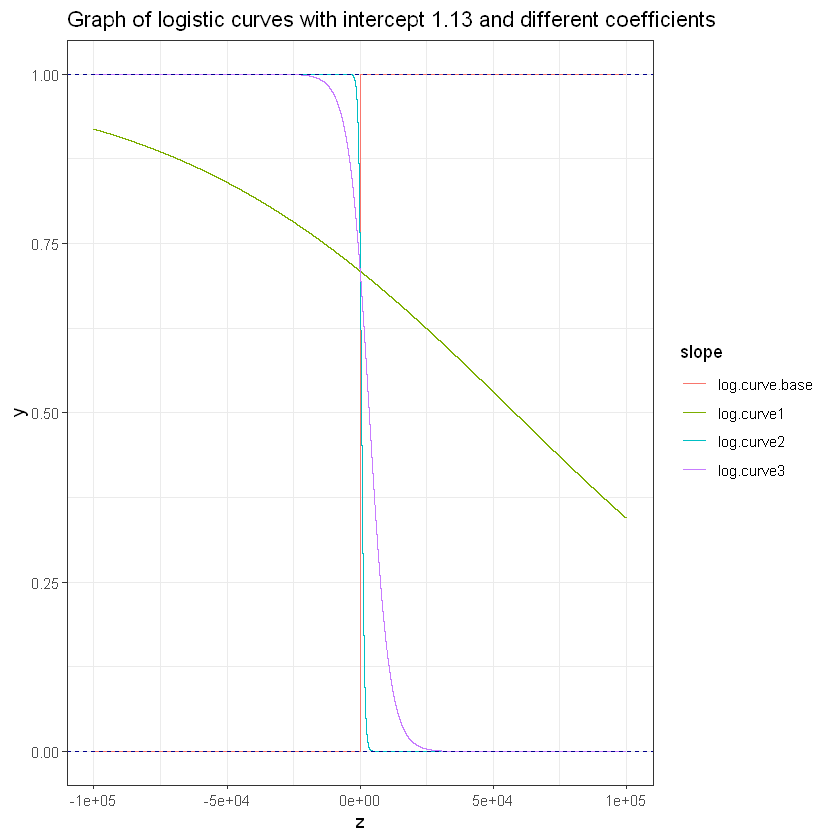

In [9]:
ggplot(M) +
    aes(x=z, y=y, color = slope) +
    geom_line() +
    theme_bw() +
    geom_hline(yintercept = 0:1, linetype = "dashed", color = "darkblue") +
    labs(title = "Graph of logistic curves with intercept 1.13 and different coefficients")

**Comparison:**

In [9]:
#The smallest to the largest  intercepts
dd = data.frame(coefs = c(coef.1[[1]], coef.2[[1]], coef.3[[1]]))
dd[order(dd$coefs),]
order(dd$coefs)

[1] 0.8914387 0.8973268 1.0779439

[1] 1 3 2

In [10]:
#The smallest to the largest absolute slopes
dd = data.frame(coefs = c(coef.1[[2]], coef.2[[2]], coef.3[[2]]))
abs(dd[order(dd$coefs),])
order(abs(dd$coefs))

[1] 0.0018398448 0.0002612135 0.0000153553

[1] 1 3 2

**NOTE:** <br>
We see that curve1, curve3 and curve2 approach to the probability 0 and 1 very slowly, resepctively. <br>
However, the baseline curve which has the intercept of 0 and coefficient beta1 equal to 1, converges to 0 and 1 much faster. <br>
That is because curve1, curve3 and curve2 have smaller slopes (flatter). also they are negative, so the slopes are negative. <br>
Curve 1,2 and 3 intercepts are all positive so these curves are all on the left side of the base curve. <br>
Based on the summary of logistic regressions above, we can see that none of the coefficients besides the intercept are significant.

**For each model, let's find the inflection point’s x and y coordinates. We would like to find the derivative at the inflection point.**

The inflection point happens at z = - (b_0/b_1). <br>
and the derivative at the inflection point will be: -(b_1)/4 <br>
Now let's calculate these values for our 3 different curves:

In [11]:
df <- data.frame(curves = c(1, 2, 3),
                 b_0 = c(coef.1[[1]], coef.2[[1]], coef.3[[1]]),
                 b_1 = c(coef.1[[2]], coef.2[[2]], coef.3[[2]])
                ) %>% 
                    dplyr::mutate(inflection.point = -b_0/b_1
                ) %>% 
                    dplyr::mutate(derivative.infl.point = -b_1/4)
                                  
                
df

curves,b_0,b_1,inflection.point,derivative.infl.point
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.8914387,-0.0000153553,58054.1374,3.838825e-06
2,1.0779439,-0.0018398448,585.8885,4.599612e-04
3,0.8973268,-0.0002612135,3435.2231,6.530339e-05
